In [65]:
!pip install yfinance
!pip install beautifulsoup4
!pip install requests
!pip install pandas

In [66]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from io import StringIO

In [69]:
# Pregunta 1: Extracción de datos de acciones de Tesla usando yfinance
import yfinance as yf
tesla_data = yf.Ticker("TSLA").history(period="max")
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [71]:
# Pregunta 2: Extracción de datos de ingresos de Tesla usando Web Scraping
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

tesla_revenue_html = str(soup.find_all("table")[0])
tesla_revenue = pd.read_html(StringIO(tesla_revenue_html))[0]
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',', '').str.replace('$', '').astype(float)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
print(tesla_revenue.tail())

                            Date  Revenue
8  1970-01-01 00:00:00.000002013   2013.0
9  1970-01-01 00:00:00.000002012    413.0
10 1970-01-01 00:00:00.000002011    204.0
11 1970-01-01 00:00:00.000002010    117.0
12 1970-01-01 00:00:00.000002009    112.0


In [73]:
# Pregunta 3: Extracción de datos de acciones de GameStop usando yfinance
gme_data = yf.Ticker("GME").history(period="max")
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [75]:
# Pregunta 4: Extracción de datos de ingresos de GameStop usando Web Scraping
gme_revenue_html = str(soup.find_all("table")[1])
gme_revenue = pd.read_html(StringIO(gme_revenue_html))[0]
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',', '').str.replace('$', '').astype(float)
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
print(gme_revenue.tail())

         Date  Revenue
49 2010-06-30     28.0
50 2010-03-31     21.0
51 2009-12-31      NaN
52 2009-09-30     46.0
53 2009-06-30     27.0


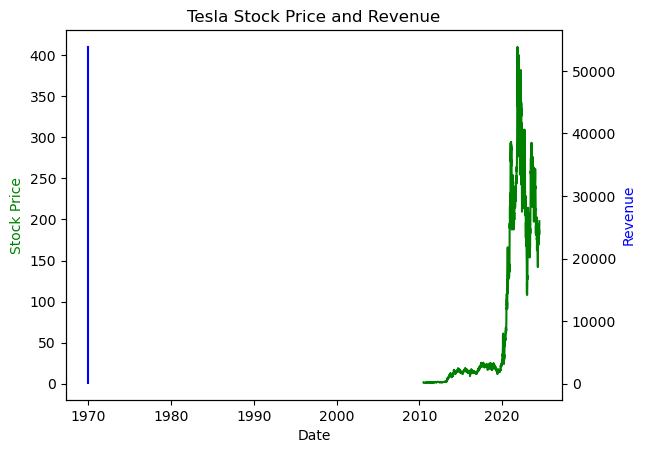

In [77]:
# Pregunta 5: Representar gráficamente las acciones de Tesla
import matplotlib.pyplot as plt

def make_graph(data, revenue, title):
    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(data['Date'], data['Close'], 'g-')
    ax2.plot(revenue['Date'], revenue['Revenue'], 'b-')

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='g')
    ax2.set_ylabel('Revenue', color='b')

    plt.title(title)
    plt.show()

make_graph(tesla_data, tesla_revenue, "Tesla Stock Price and Revenue")

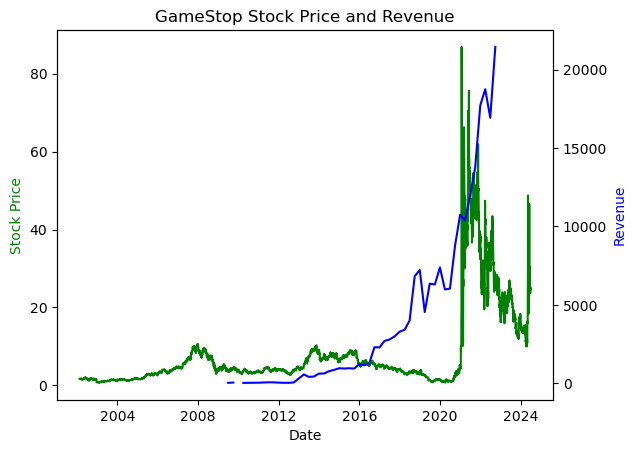

In [79]:
# Pregunta 6: Representar gráficamente las acciones de GameStop
make_graph(gme_data, gme_revenue, "GameStop Stock Price and Revenue")

# Conclusión

Este proyecto mostró cómo extraer y analizar datos financieros de Tesla y GameStop utilizando `yfinance` y técnicas de web scraping. A través de la visualización de los precios de las acciones y los ingresos, pudimos observar las tendencias en el rendimiento financiero de ambas compañías. La comparación de estos datos proporciona una visión clara de cómo los ingresos pueden influir en los precios de las acciones.

### Puntos clave:
- **Tesla**: Aumento constante en los ingresos y una correlación positiva con el precio de las acciones.
- **GameStop**: Variabilidad en los ingresos con fluctuaciones significativas en el precio de las acciones.

Estos análisis son fundamentales para la toma de decisiones informadas en el ámbito de la inersión.
